In [49]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

# Remember, the windows are the INVERSE of the absorption features
# Next - build ability to choose seed (both in make_specs and empca)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


[ 0.54506222  0.6008077   0.60125637  0.60173421  0.60245918  0.60306632] [ 0.54506222  0.60133191  0.60229038  0.60317046  0.6041082   0.60494799]
var, Vnoise  6.74510321576e-05 6.07896767045e-05
[ 0.54506222  0.82910439  0.86719337  0.88299342  0.91406589  0.93710289] [ 0.54506222  0.63606315  0.85401734  0.8891758   0.96781257  0.97563457]
var, Vnoise  1.0403929493e-05 4.16571962045e-05


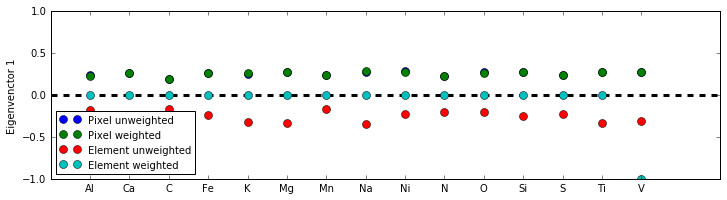

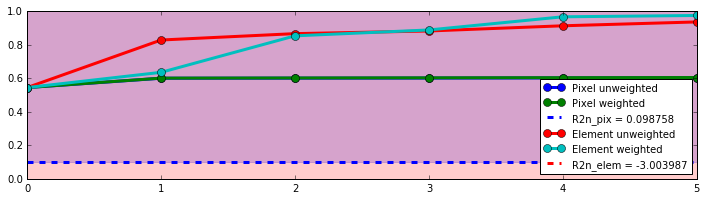

In [24]:
run test_empca -i 1

In [13]:
np.median(specs,axis=1).shape

(846,)

In [20]:
 m1,m2,w1,w2 = pix_empca(None,falsespecs.T,noise,'test.pkl',nvecs=5,deltR2=2e-3,gen=True,usemad=False,randseed=1)

In [21]:
m1

In [23]:
m2.R2(0)

0.0

PIXEL SPACE
number of unusable pixels,  0
       iter        R2             rchi2
EMPCA  1/25       0.02656003      0.00013244
EMPCA  2/25       0.16250212      0.00009910
EMPCA  3/25       0.19992654      0.00009333
EMPCA  4/25       0.21945627      0.00009055
EMPCA  5/25       0.23114063      0.00008897
EMPCA  6/25       0.23795499      0.00008807
EMPCA  7/25       0.24139550      0.00008752
EMPCA  8/25       0.24464428      0.00008705
EMPCA  9/25       0.24714823      0.00008672
EMPCA 10/25       0.24881339      0.00008653
R2: 0.254953666763
nans  (array([], dtype=int64), array([], dtype=int64))
       iter        R2             rchi2
EMPCA  1/25       0.03077172      2.66621347
EMPCA  2/25       0.19291683      2.01565723
EMPCA  3/25       0.22757664      1.88970950
EMPCA  4/25       0.25318115      1.81745237
EMPCA  5/25       0.27002363      1.77528165
EMPCA  6/25       0.27776835      1.75618094
EMPCA  7/25       0.27999116      1.74933734
EMPCA  8/25       0.28209956      1.743

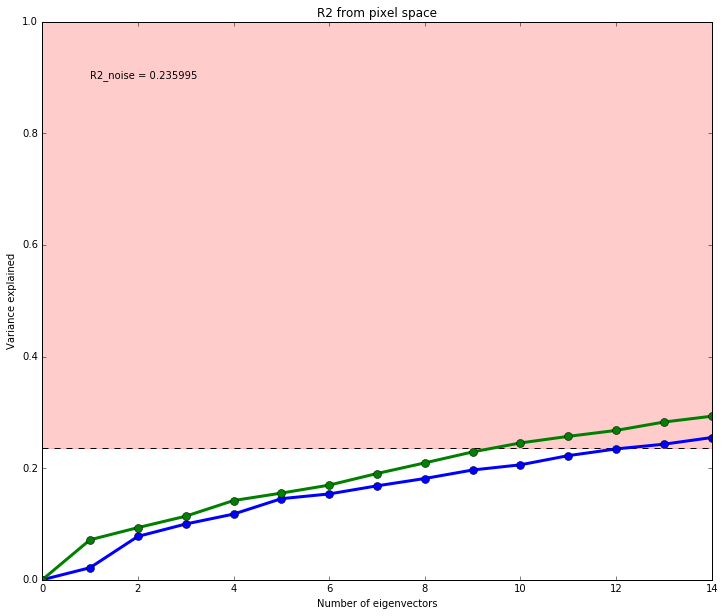

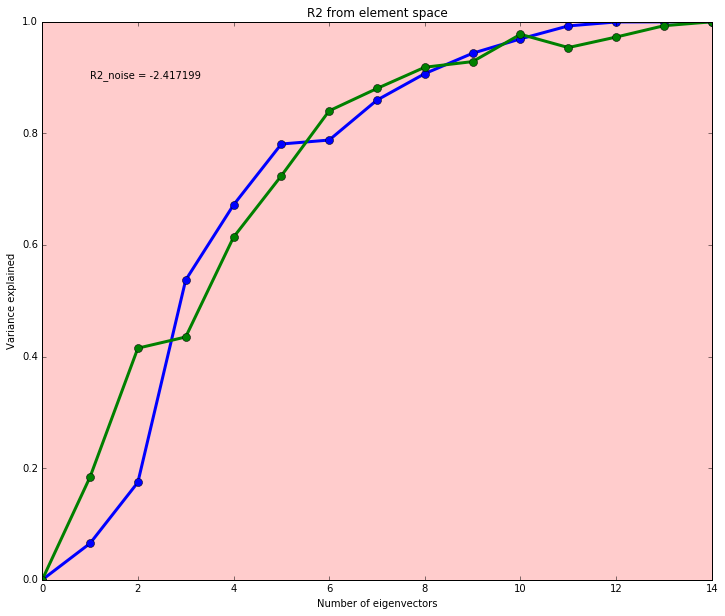

In [18]:
run run_empca -vugp -m red_clump/pickles/models/model_FE_H_u-0.1_d-0.105.pkl -d 2e-3 -n 14

In [128]:
def randomize_residual(residual,uncertainty):
    return uncertainty.T*np.random.randn(residual.shape[0],residual.shape[1])+residual

def weight(residual,numstars,model):
    weighted = np.ma.masked_array(np.zeros((len(elems),numstars)))
    i=0
    for elem in elems:
        weighted[i] = model.weighting_stars(residual,elem,'BLARGH.pkl')
        i+=1
    return weighted

In [154]:
iters=1000
randoms = np.ma.masked_array(np.zeros((iters,len(elems),model.numstars)))
rands = np.ma.masked_array(np.zeros((iters,aspcappix,model.numstars)))
for i in range(iters):
    rand_resid = randomize_residual(model.residual,model.errs)
    rands[i] = rand_resid
    randoms[i] = weight(rand_resid,model.numstars,model)

In [155]:
stds_pix = np.ma.masked_array(np.zeros((aspcappix,model.numstars)))
for i in range(aspcappix):
    pix_rands = rands[:,i]
    stds_pix[i] = np.ma.std(pix_rands,axis=0)
stds_pix.mask = model.errs.T.mask
diff_pix = model.errs.T - stds_pix

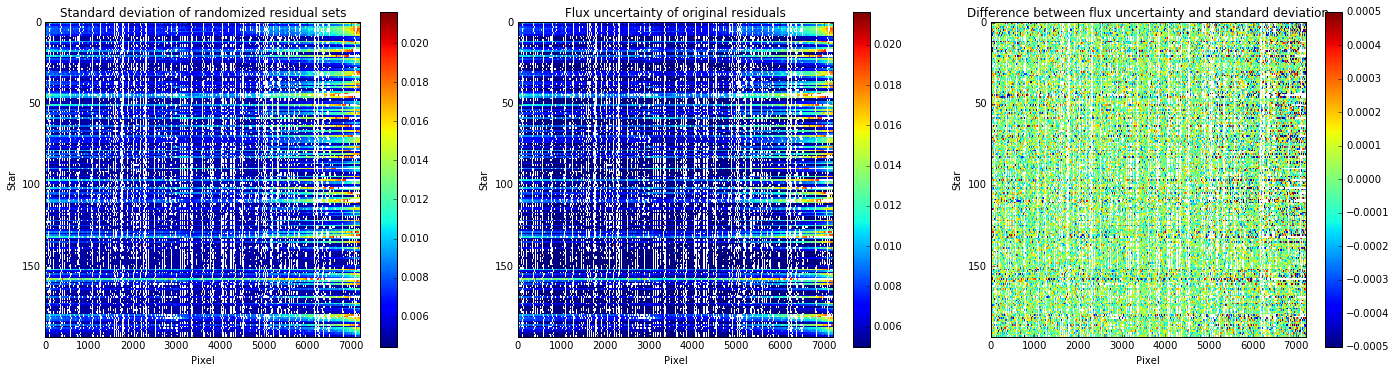

In [156]:
plt.figure(figsize=(24,6))
plt.subplot2grid((1,3),(0,0))
plt.imshow(stds_pix.T,aspect = float(stds_pix.shape[0])/stds_pix.shape[1],interpolation='nearest')
plt.xlabel('Pixel')
plt.ylabel('Star')
plt.title('Standard deviation of randomized residual sets')
plt.colorbar()
plt.subplot2grid((1,3),(0,1))
plt.imshow(model.errs,aspect = float(stds_pix.shape[0])/stds_pix.shape[1],interpolation='nearest')
plt.xlabel('Pixel')
plt.ylabel('Star')
plt.title('Flux uncertainty of original residuals')
plt.colorbar()
plt.subplot2grid((1,3),(0,2))
plt.imshow(diff_pix.T,aspect = float(stds_pix.shape[0])/stds_pix.shape[1],interpolation='nearest',vmin=-5e-4,vmax=5e-4)
plt.xlabel('Pixel')
plt.ylabel('Star')
plt.title('Difference between flux uncertainty and standard deviation')
plt.colorbar()


In [157]:
stds_elem = np.zeros((len(elems),model.numstars))
for i in range(len(elems)):
    elem_rands = randoms[:,i]
    stds_elem[i] = np.ma.std(elem_rands,axis=0)
diff_elem = errs - stds_elem

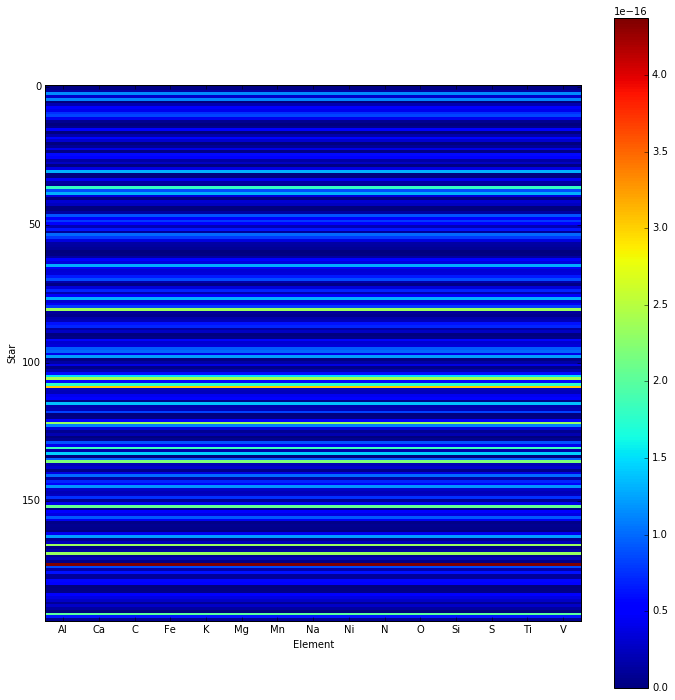

In [158]:
stds_elem = stds_elem.T
plt.figure(figsize=(12,12))
plt.imshow(stds_elem,aspect = float(stds_elem.shape[1])/stds_elem.shape[0],interpolation='nearest')
plt.ylabel('Star')
plt.xlabel('Element')
plt.xticks(range(len(elems)),elems)
plt.colorbar()

In [159]:
argument=model.data['TEFF']>4500

In [160]:
argument

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [170]:
model.getData()

In [173]:
import apogee.tools.read as apread
test = apread.rcsample()

In [190]:
test.dtype

dtype([('APSTAR_ID', 'S45'), ('ASPCAP_ID', 'S44'), ('APOGEE_ID', 'S18'), ('TELESCOPE', 'S8'), ('LOCATION_ID', '>i2'), ('FIELD', 'S16'), ('J', '>f4'), ('J_ERR', '>f4'), ('H', '>f4'), ('H_ERR', '>f4'), ('K', '>f4'), ('K_ERR', '>f4'), ('RA', '>f8'), ('DEC', '>f8'), ('GLON', '>f8'), ('GLAT', '>f8'), ('APOGEE_TARGET1', '>i4'), ('APOGEE_TARGET2', '>i4'), ('TARGFLAGS', 'S116'), ('NVISITS', '>i4'), ('COMMISS', '>i2'), ('SNR', '>f4'), ('STARFLAG', '>i4'), ('STARFLAGS', 'S129'), ('ANDFLAG', '>i4'), ('ANDFLAGS', 'S59'), ('VHELIO_AVG', '>f4'), ('VSCATTER', '>f4'), ('VERR', '>f4'), ('VERR_MED', '>f4'), ('STABLERV_CHI2', '>f4', (2,)), ('STABLERV_RCHI2', '>f4', (2,)), ('STABLERV_CHI2_PROB', '>f4', (2,)), ('EXTRATARG', '>i2'), ('PARAM', '>f4', (7,)), ('FPARAM', '>f4', (7,)), ('PARAM_COV', '>f4', (7, 7)), ('FPARAM_COV', '>f4', (7, 7)), ('ELEM', '>f4', (15,)), ('FELEM', '>f4', (15,)), ('ELEM_ERR', '>f4', (15,)), ('FELEM_ERR', '>f4', (15,)), ('TEFF', '>f4'), ('LOGG', '>f4'), ('PARAM_M_H', '>f4'), ('PARAM

In [216]:
class dogInfo(object):
    def __init__(self,name,age,arr):
        self.name = name
        self.age = age
        self.arr = arr

In [217]:
names = ['Larry','Curly','Moe']
ages = [10,4,7]
arrs = [np.arange(1,5),np.arange(1,5)+1,np.arange(1,5)+2]

In [218]:
dogs = []
for i in range(len(names)):
    dogs.append(dogInfo(names[i],ages[i],arrs[i]))

In [199]:
dogs

In [205]:
[dogs[i].name for i in range(len(dogs))]

['Larry', 'Curly', 'Moe']

In [206]:
moe = dogs[-1]

In [215]:
(test['TEFF'] > 4500) & (test['TEFF'] < 4600)

array([False, False, False, ..., False, False, False], dtype=bool)

In [220]:
np.array([dogs[i].arr for i in range(len(dogs))])

array([[1, 2, 3, 4],
       [2, 3, 4, 5],
       [3, 4, 5, 6]])